# HW7 (total points 6)

# Use pandas API to finish problem in this notebook.

https://pandas.pydata.org/pandas-docs/stable/reference/index.html

Total points 6

In [1]:
import numpy as np
import pandas as pd
from io import BytesIO
from zipfile import ZipFile
import requests
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#you may want to import some other modules here such as seaborn or matplotlib

**Let download movie lense dataset [MovieLens](https://grouplens.org/datasets/movielens/) and extract zip file using various python packages**

http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [2]:
r = requests.get("http://files.grouplens.org/datasets/movielens/ml-latest-small.zip")
print(r.status_code)
zipfile = ZipFile(BytesIO(r.content))

200


In [3]:
zipfile.extractall()

In [4]:
! ls ml-latest-small/

links.csv  movies.csv  ratings.csv  README.txt	tags.csv


In [5]:
! head  ./ml-latest-small/movies.csv

**It is a csv file.** We can use pandas read_csv to read this file into pandas DataFrame

In [6]:
# lets read movies.csv file
movie = pd.read_csv('./ml-latest-small/movies.csv')

movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Q1 (.25 point) Check if any of the columns are null

In [7]:
# write pandas code here
movie.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

# Q 2 (.25 point) Check datatype of each of the columns

In [8]:
# write pandas code here
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


# Q3 (.5 point) Using *str* on series genres, build the unique_genre set. It should contain all the unique genres from genres column. Print unique genres too.



In [9]:
# write pandas code here
#unique_genre = ???
genres = movie["genres"]
genres = genres.str.split("|")
unique_genre = set()
for row in genres:
    for genre in row:
        unique_genre.add(genre)
print(unique_genre)

{'Animation', 'Romance', 'Documentary', 'Thriller', 'Mystery', 'Children', 'Action', '(no genres listed)', 'Horror', 'Musical', 'War', 'Crime', 'Fantasy', 'Film-Noir', 'Drama', 'IMAX', 'Comedy', 'Western', 'Sci-Fi', 'Adventure'}


# Q 4 (1 point) Build columns for different genres with value True or False based on whether a genre is present or not in an observation?



In [10]:
# write pandas code here
movie = movie.drop(["genres"], axis=1)
movie = movie.join(genres)
movie = movie[["movieId", "title"]].join(pd.crosstab((s:=movie["genres"].explode()).index,s))

movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movieId             9742 non-null   int64 
 1   title               9742 non-null   object
 2   (no genres listed)  9742 non-null   int64 
 3   Action              9742 non-null   int64 
 4   Adventure           9742 non-null   int64 
 5   Animation           9742 non-null   int64 
 6   Children            9742 non-null   int64 
 7   Comedy              9742 non-null   int64 
 8   Crime               9742 non-null   int64 
 9   Documentary         9742 non-null   int64 
 10  Drama               9742 non-null   int64 
 11  Fantasy             9742 non-null   int64 
 12  Film-Noir           9742 non-null   int64 
 13  Horror              9742 non-null   int64 
 14  IMAX                9742 non-null   int64 
 15  Musical             9742 non-null   int64 
 16  Mystery             9742

# Q5(1 point) Build a "year" column in movie data frame. The title "year" should be included in title column.

Python regular expression  package **re** is very useful tool for text data handling.  This excercise is a very primitive use of it.


note
- . mean any character
- *. means "0 or more instances of the preceding regex token
- \[ matches a literal [ character
- [A-Za-z0-9] digits and lower, upper case, I think same as \w+
- '+' matches one more more times
- \d Matches any decimal digit

In [11]:
movie['year'] = movie.title.str.extract(r'.*\((\d{4})\)', expand = True)
movie["year"]

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
9737    2017
9738    2017
9739    2017
9740    2018
9741    1991
Name: year, Length: 9742, dtype: object

# Q6.(.5 point) Using seaborn, plot a bar plot of the number of movies per year. Do you see any trend?

Text(0.5, 1.0, 'Number of Movies per Year')

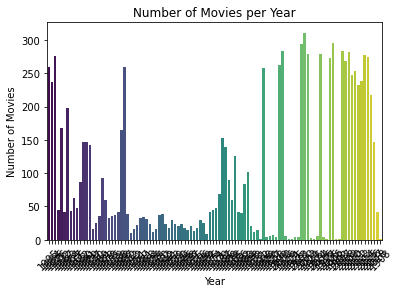

In [12]:
# write code here.
sns.countplot(x="year", data=movie, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Number of Movies per Year")

We can see a trend where there are years with a very large number of movies, followed by years with barely any movies, followed by years with a large number of movies, etc

# Q7.(1 point) Using matplotlib, plot total number of movies (cumulative over all the years) for each genre.  Your plot should have proper title, axis labels and legends. 

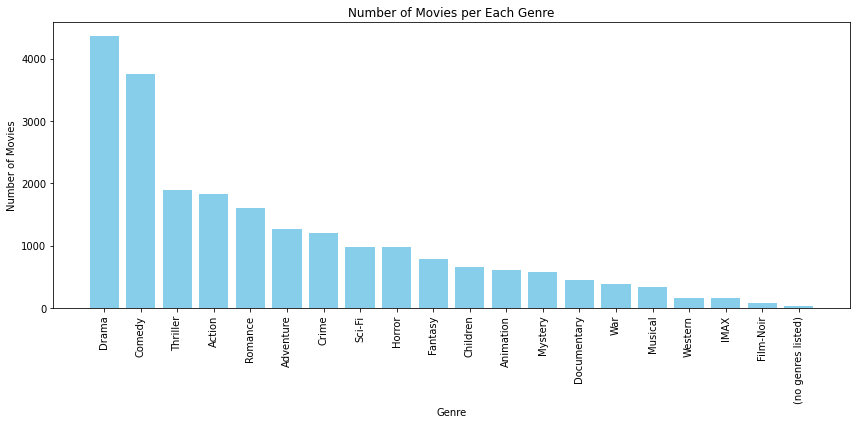

In [13]:
genre_counts = movie.drop(["year", "movieId", "title"], axis=1).sum().sort_values(ascending=False)
genre_counts
plt.figure(figsize=(12, 6))
plt.bar(genre_counts.index, genre_counts.values, color='skyblue')

plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.title("Number of Movies per Each Genre")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Q 8 (.5 point) Build a *movie_title* column containing  the title of the movie. (It should not contain year). Drop the original *title* columns. Display final movie dataFrame.

In [14]:
 # write pandas code here
movie['title'] = movie.title.str.extract(r'^(.*?)\s*\(', expand = True)
movie["title"] = movie.title.str.strip()
movie["title"]

0                                Toy Story
1                                  Jumanji
2                         Grumpier Old Men
3                        Waiting to Exhale
4              Father of the Bride Part II
                       ...                
9737    Black Butler: Book of the Atlantic
9738                 No Game No Life: Zero
9739                                 Flint
9740          Bungo Stray Dogs: Dead Apple
9741          Andrew Dice Clay: Dice Rules
Name: title, Length: 9742, dtype: object

# Q 9(1 point) Using seaborn, plot average number of words in a movie name over the years in different genres. You may choose to make separate plots for each genre or to make a single color coded plot as a function of years. All plots should have proper title, axis labels and legends. Write your observation in no more than 2 lines.

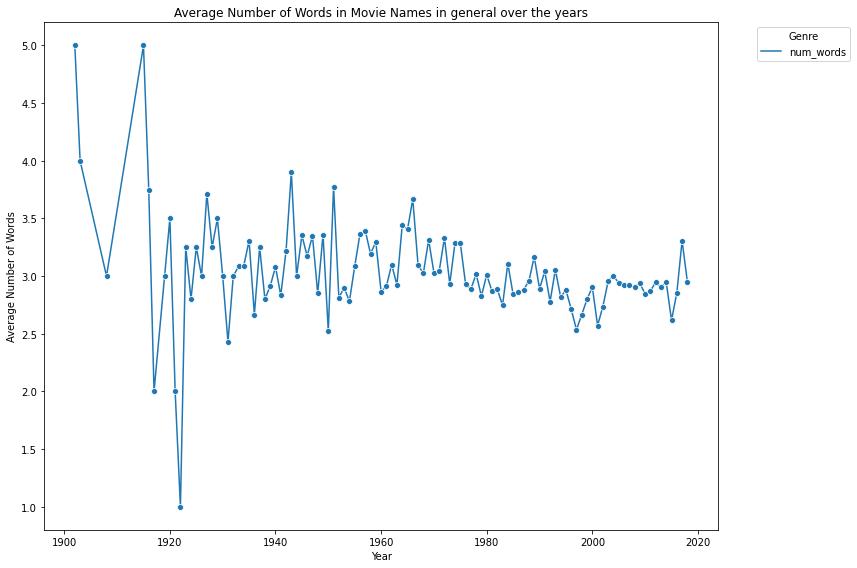

In [15]:
# # Write your code here.
a = movie.copy()
# Unfortunately, some years and titles were not extracted correctly, so they must be eliminated
a = a.dropna()
a["title"] = a["title"].astype(str)
a["year"] = a["year"].astype(int)
a['num_words'] = a['title'].apply(lambda x: len(x.split()))
a = a.groupby('year')[['num_words']].mean().reset_index()
a = pd.melt(a, id_vars='year', var_name='genre', value_name='average_words')
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='average_words', hue='genre', data=a, marker='o')
plt.xlabel("Year")
plt.ylabel("Average Number of Words")
plt.title("Average Number of Words in Movie Names in general over the years")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

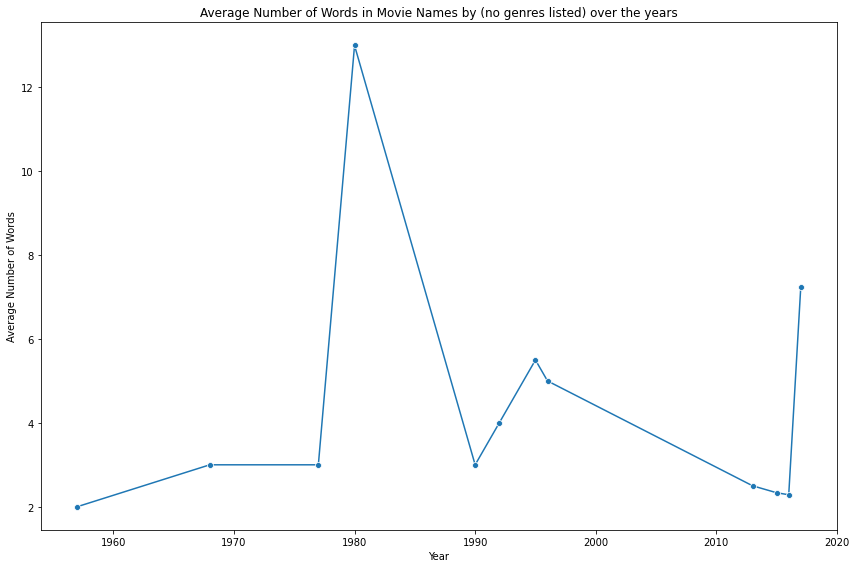

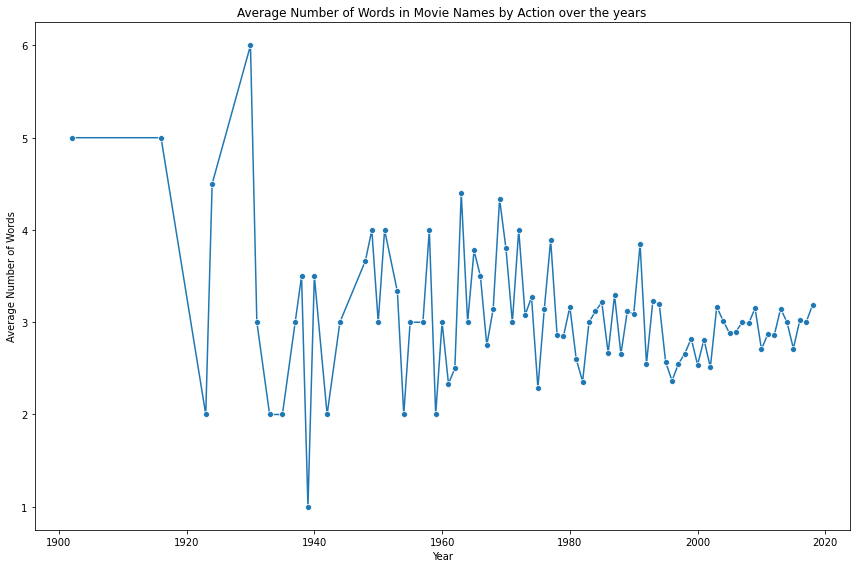

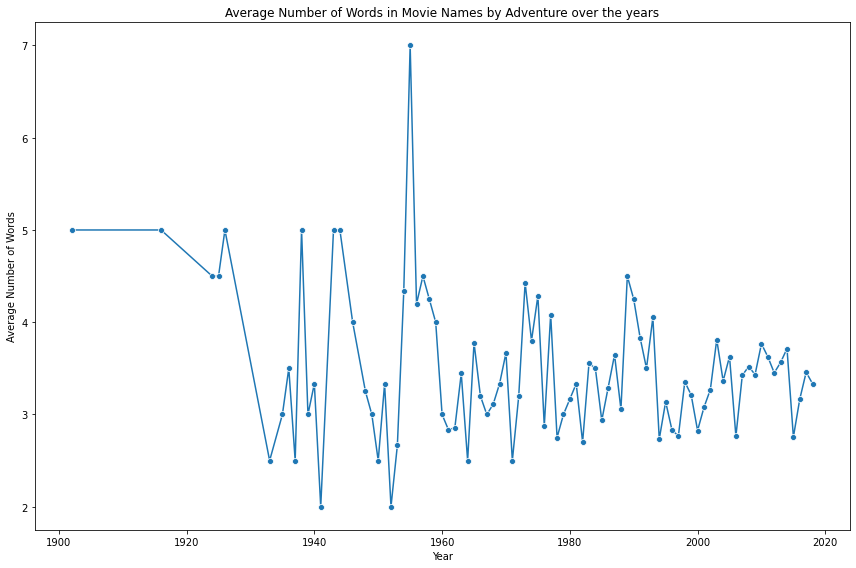

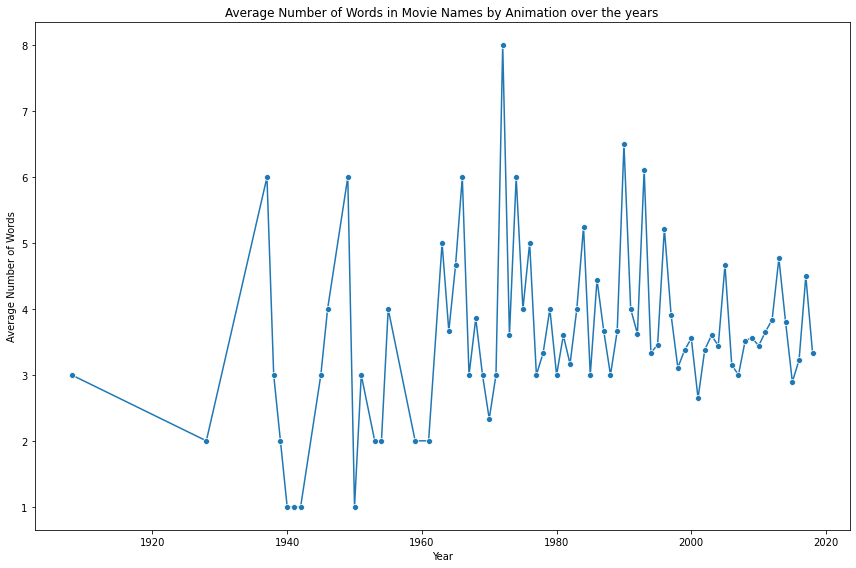

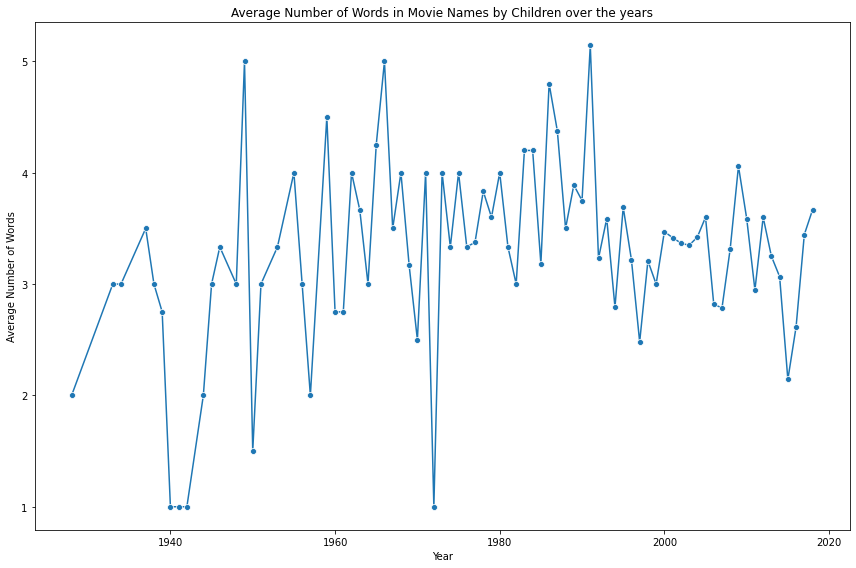

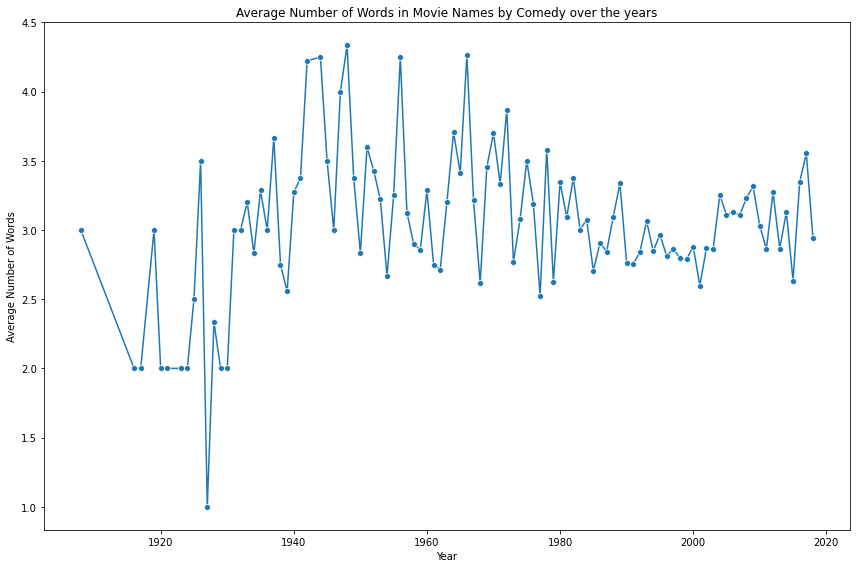

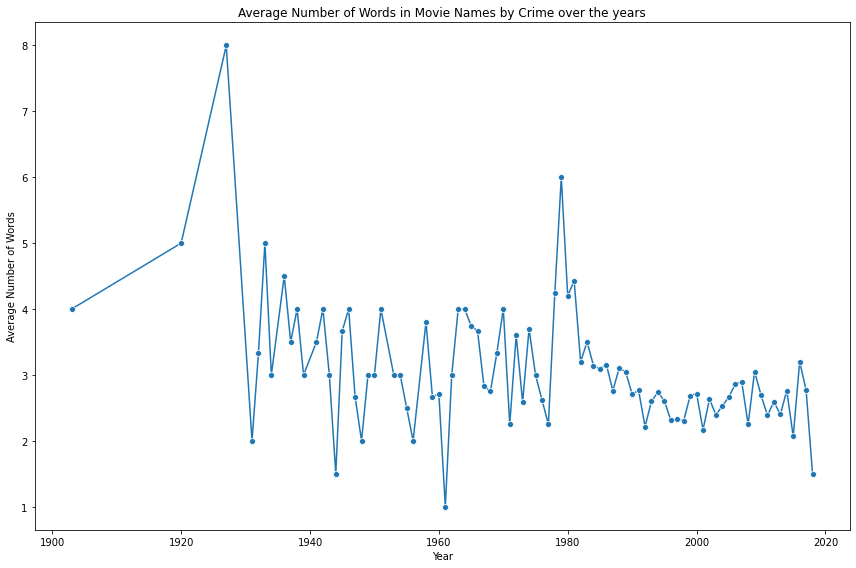

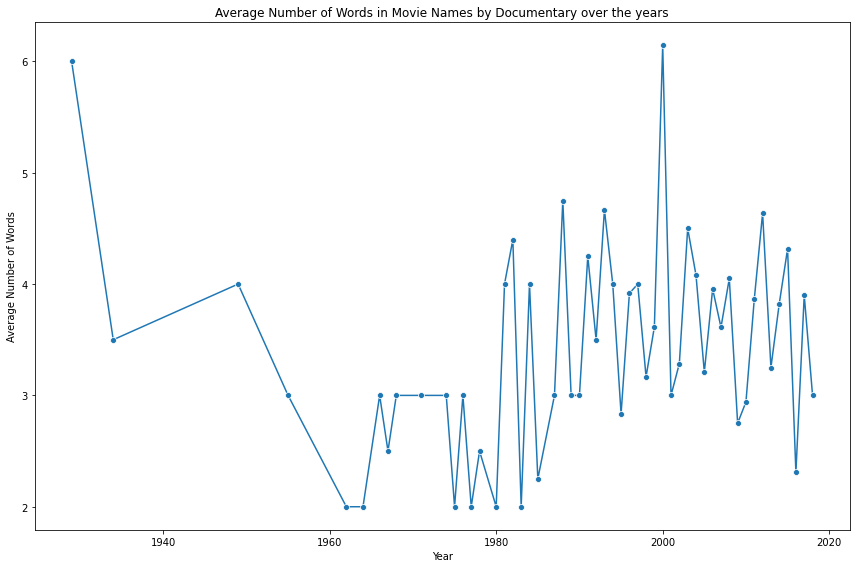

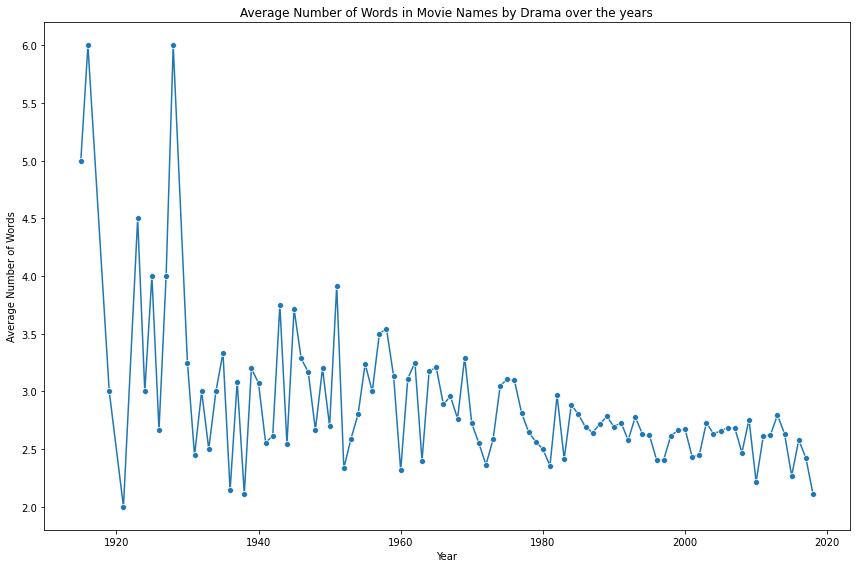

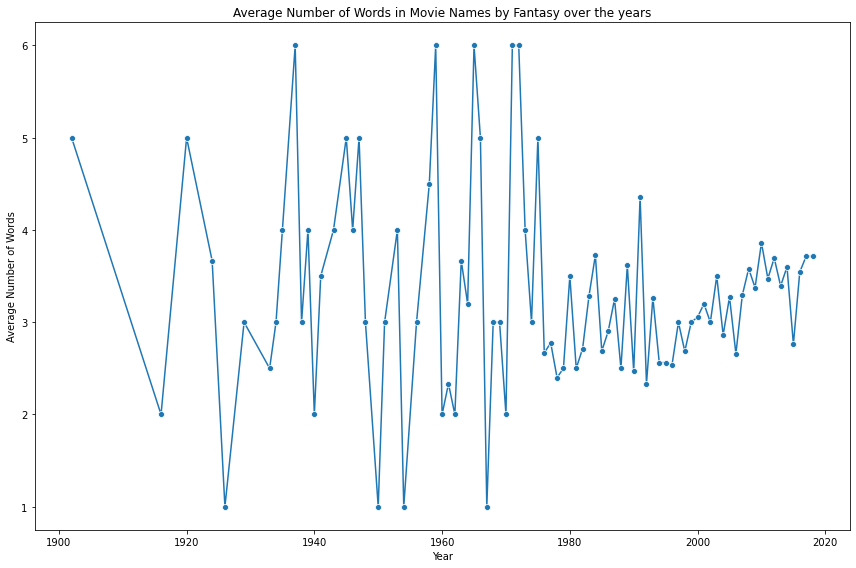

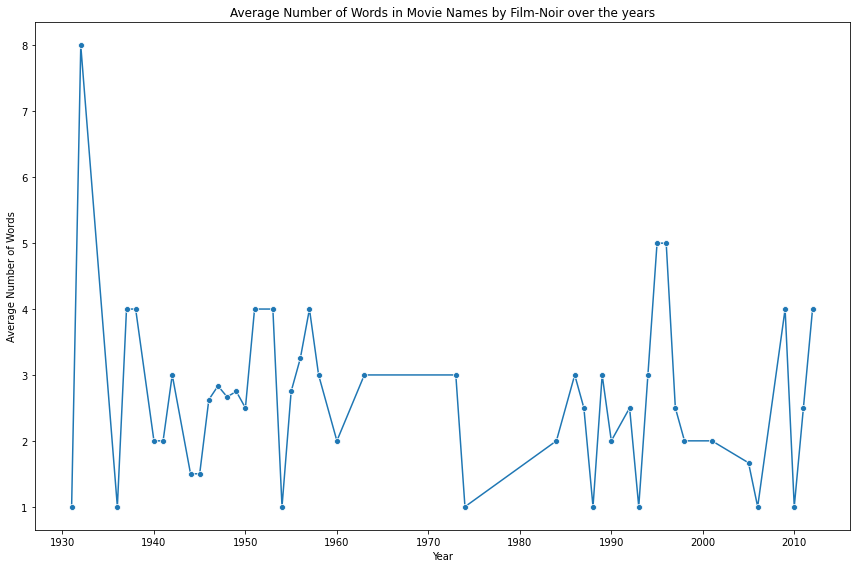

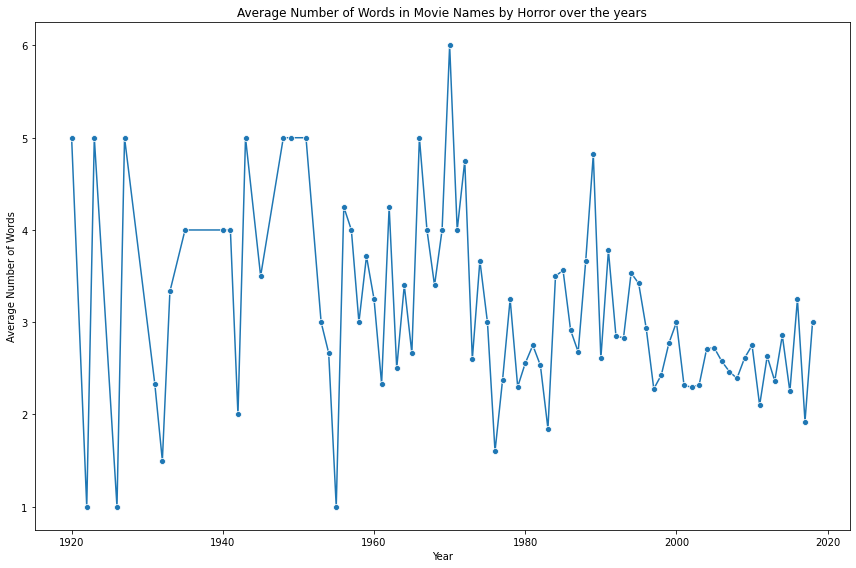

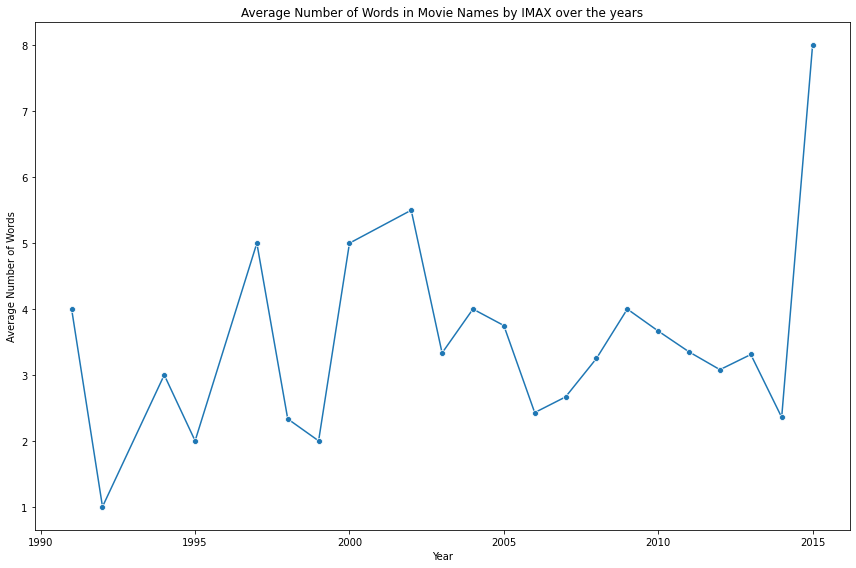

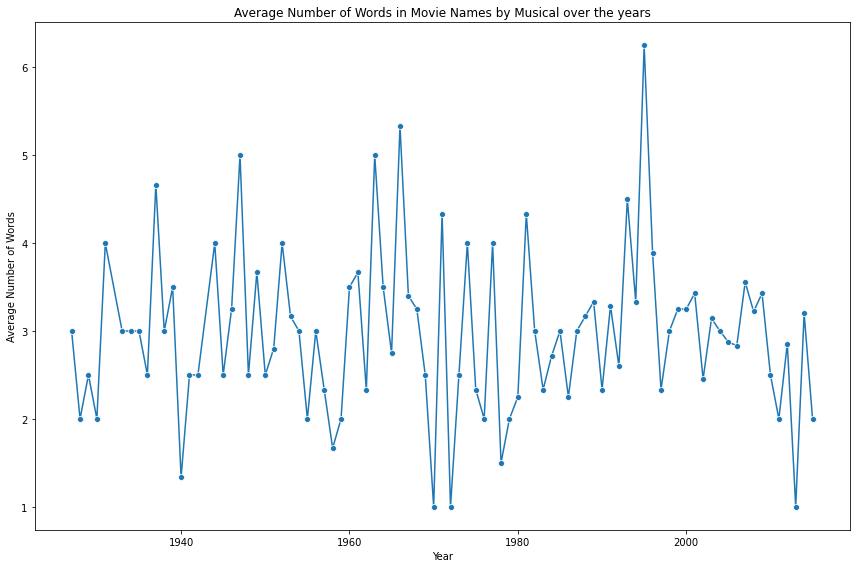

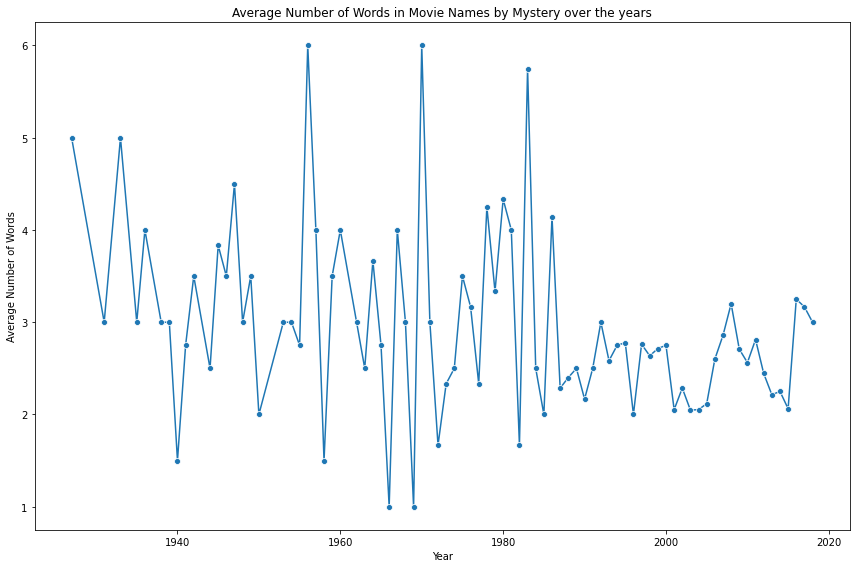

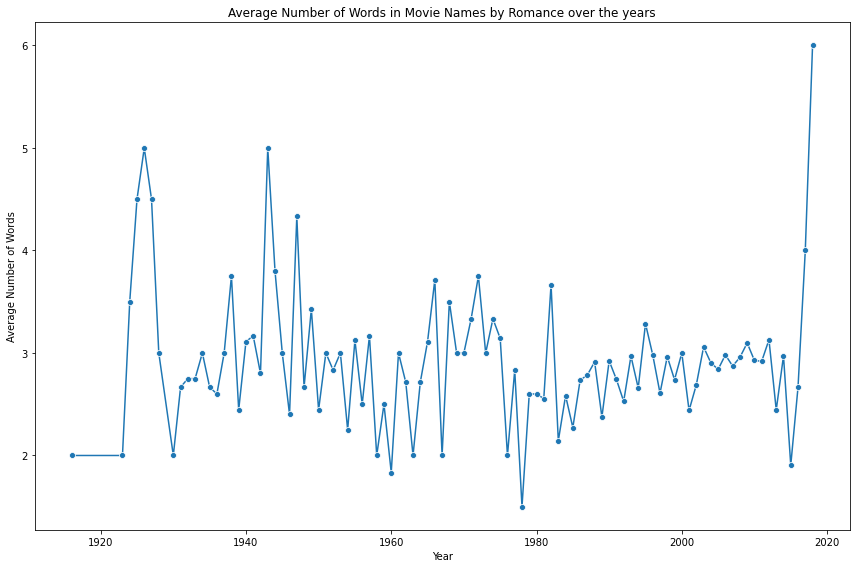

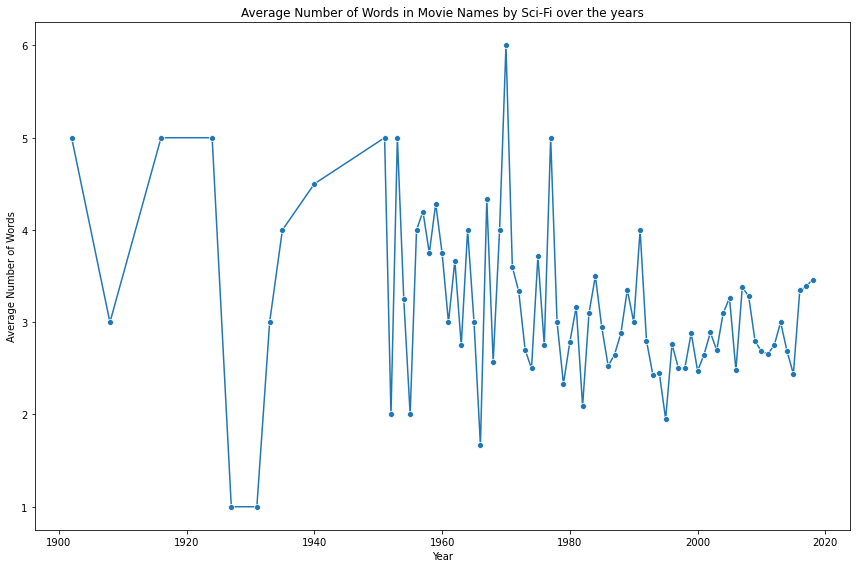

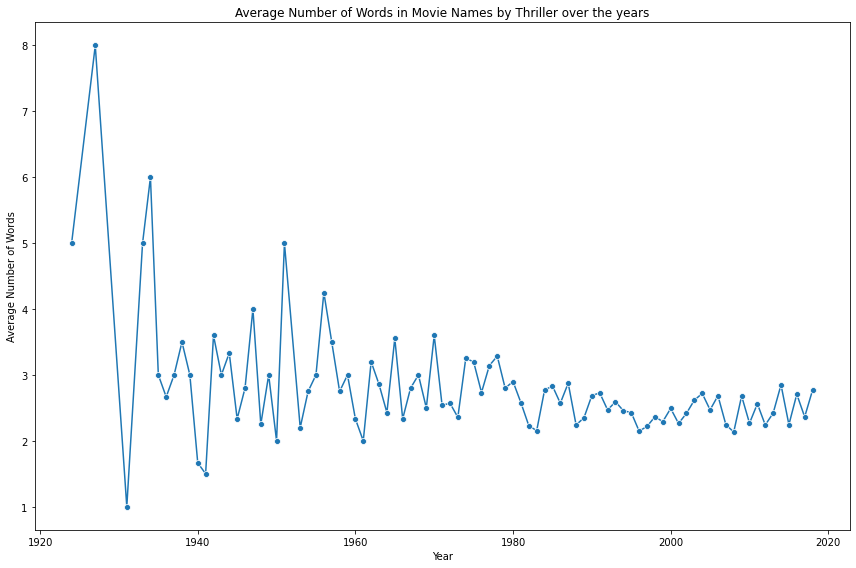

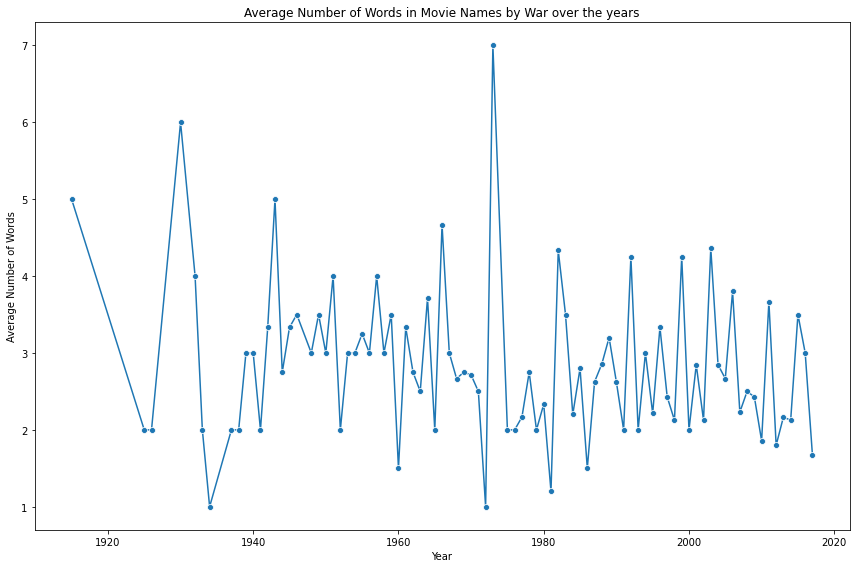

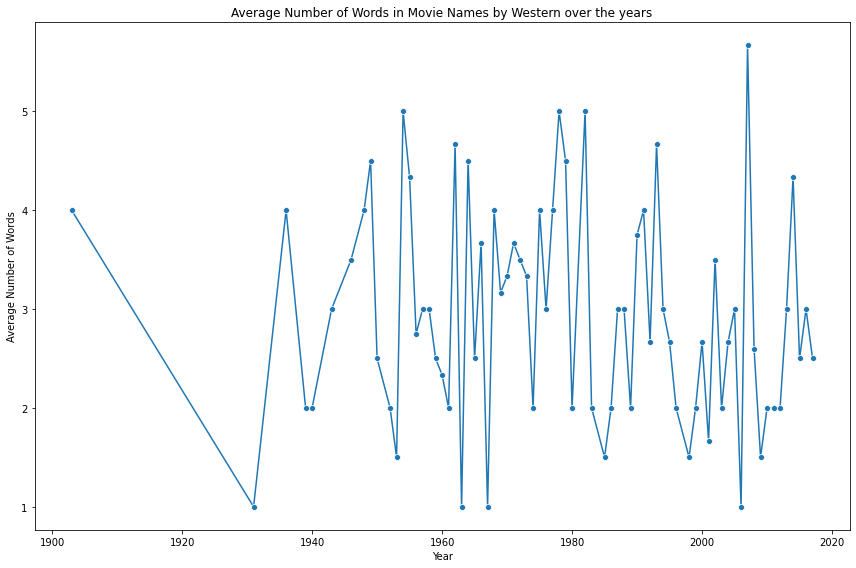

In [17]:
# # Write your code here.
a = movie.copy()
# Unfortunately, some years and titles were not extracted correctly, so they must be eliminated
a = a.dropna()
a["title"] = a["title"].astype(str)
a["year"] = a["year"].astype(int)
for col in a.columns.values[2:-1]:
    b = a[a[col] > 0].copy()
    b['num_words'] = b['title'].apply(lambda x: len(x.split()))
    b = b.groupby('year')[['num_words']].mean().reset_index()
    b = pd.melt(b, id_vars='year', var_name='genre', value_name='average_words')
    plt.figure(figsize=(12, 8))
    sns.lineplot(x='year', y='average_words', data=b, marker='o')
    plt.xlabel("Year")
    plt.ylabel("Average Number of Words")
    title = "Average Number of Words in Movie Names by {} over the years".format(col)
    plt.title(title)
    plt.tight_layout()
    plt.show()

In general, the average number of words per title has been converging into 3 words per title since the 1920s. Most genres show this similar behavior trending to 3 words per title, but each genre has a different path to get there. Some start low, go high, and converge to 3, some start high, go low, converge to 3, but most converge to 3